<a href="https://colab.research.google.com/github/Alekhyaanelluri/Data-Analytics/blob/main/Copy_of_Marketing_Target_Statistical_Learning_with_R_%F0%9F%92%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'banking-dataset-marketing-targets:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F223954%2F1570881%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241205%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241205T174357Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D84ec0c714d861a497c4f4c9603a12ed8afcb0f53c29c1fd0bca86b228806b3f79210b05ba32c2787f5f791f22e9309019481d3c25a0b4eb4a9de8c3355031d6a19141ea02b70581ab0c3b7d6f826b42607a66e9cd7c446ea5049f1b1735bb9349378d2ae9f14b4a248489f8faf219e9b599791ca02b7b98ebd29dd952572277911110eb9fe7033a1109d18f96a93324f091b72399c8c4c7a5876d22fb433496d029c18a524cef3d446c0936b239cf24b858340875474ed861d4cae208db57d64746fc640f4e7d9e0c31d458e48516373ac70a75bcd219a9d29355c39b70f7d48779ee2018b5ef7efd4b001b7170586d0ab85463d4f5ce2c35d76d2d8a549646f'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: banking-dataset-marketing-targets"
[1] "Downloaded and uncompressed: banking-dataset-marketing-targets"
[1] "Data source import complete"


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:darkturquoise;border:20px;color:white'>Marketing Target Statistical Learning with R<h2>

![](https://blog.mikobey.com/files/2018/07/why-marketing-gifs-should-be-a-part-of-your-strategy-inkjet-1.gif)

This notebook will use statistical models and techniques to classify the if our target will accept the bank's term deposit.
    
<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:darkturquoise;border:20px;color:white'>Table of Contents<h2>
    
## 1. Introduction
## 2. Setup
## 3. Visualizations of the data and analysis
## 4. Statistical Models For Classification
## 5. Conclusion
    
# Introduction
    
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).
    
## Data Id 📋
    
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:
1. **Train** - 17 columns and 45211 rows.
2. **Test** - 17 columns and 4521 rows.

### **bank client data:**

1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Setup

In [ ]:
library(tidyverse)
library(mlbench)
library(gmodels)
library(class)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(mlbench): there is no package called ‘mlbench’


In [ ]:
train.path <- "/kaggle/input/banking-dataset-marketing-targets/train.csv"
test.path <- "/kaggle/input/banking-dataset-marketing-targets/test.csv"

In [ ]:
Mt_df <- read.table(train.path,header = T, sep = ";")
test_df <- read.table(test.path,header = T, sep = ";")
head(Mt_df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [ ]:
str(Mt_df)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr  "married" "single" "married" "married" ...
 $ education: chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : chr  "yes" "yes" "yes" "yes" ...
 $ loan     : chr  "no" "no" "yes" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ y        : chr  "no" "no" "no" "no" ...


In [ ]:
fact <- c(2:5,7:9,11,16,17)
num <- c(1,6,10,12:15)

for (i in fact)
{
 print(names(Mt_df)[i])
 print("Train Data(%):")
 print(round(prop.table(table(Mt_df[,i]))*100,1))
 print("Test Data(%):")
 print(round(prop.table(table(test_df[,i]))*100,1))
}

for (i in num)
{
 print(names(Mt_df)[i])
 print("Train Data(%):")
 print(summary(Mt_df[,i]))
 print("Test Data(%):")
 print(summary(test_df[,i]))
}

[1] "job"
[1] "Train Data(%):"

       admin.   blue-collar  entrepreneur     housemaid    management 
         11.4          21.5           3.3           2.7          20.9 
      retired self-employed      services       student    technician 
          5.0           3.5           9.2           2.1          16.8 
   unemployed       unknown 
          2.9           0.6 
[1] "Test Data(%):"

       admin.   blue-collar  entrepreneur     housemaid    management 
         10.6          20.9           3.7           2.5          21.4 
      retired self-employed      services       student    technician 
          5.1           4.0           9.2           1.9          17.0 
   unemployed       unknown 
          2.8           0.8 
[1] "marital"
[1] "Train Data(%):"

divorced  married   single 
    11.5     60.2     28.3 
[1] "Test Data(%):"

divorced  married   single 
    11.7     61.9     26.5 
[1] "education"
[1] "Train Data(%):"

  primary secondary  tertiary   unknown 
     15.2      

## Checking for NA and Null values

In [ ]:
any(is.null(Mt_df))

[1] FALSE

In [ ]:
any(is.na(Mt_df))

[1] FALSE

# Visualizations of the data and analysis 📊

## variable plots and distributions

Firstly, each variable will be analized seperately in the folowing method:

* **Continuous Variables**:
    1. Histogram/area.
    2. Summarry.
    
* **Discrete Variables**:
    1. Barplot.
    2. Proportion table.

    

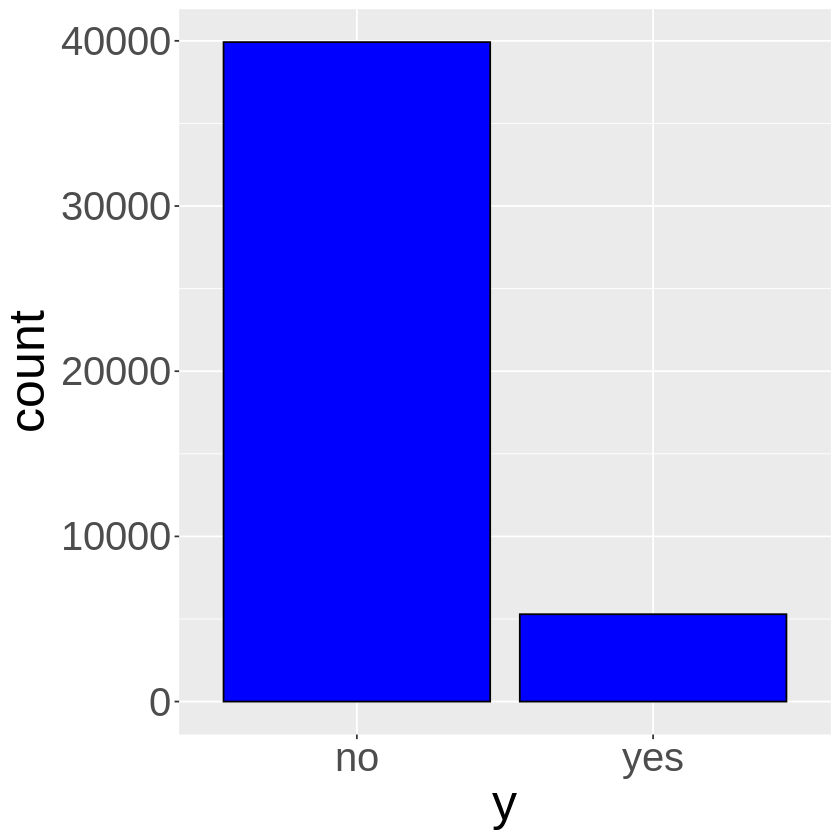

In [ ]:
y_bar <- ggplot(Mt_df, aes(y))
y_bar + geom_bar(color = "black",fill = "blue") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$y))*100,1)


  no  yes 
88.3 11.7 

In [ ]:
#creating a function to control figure size
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

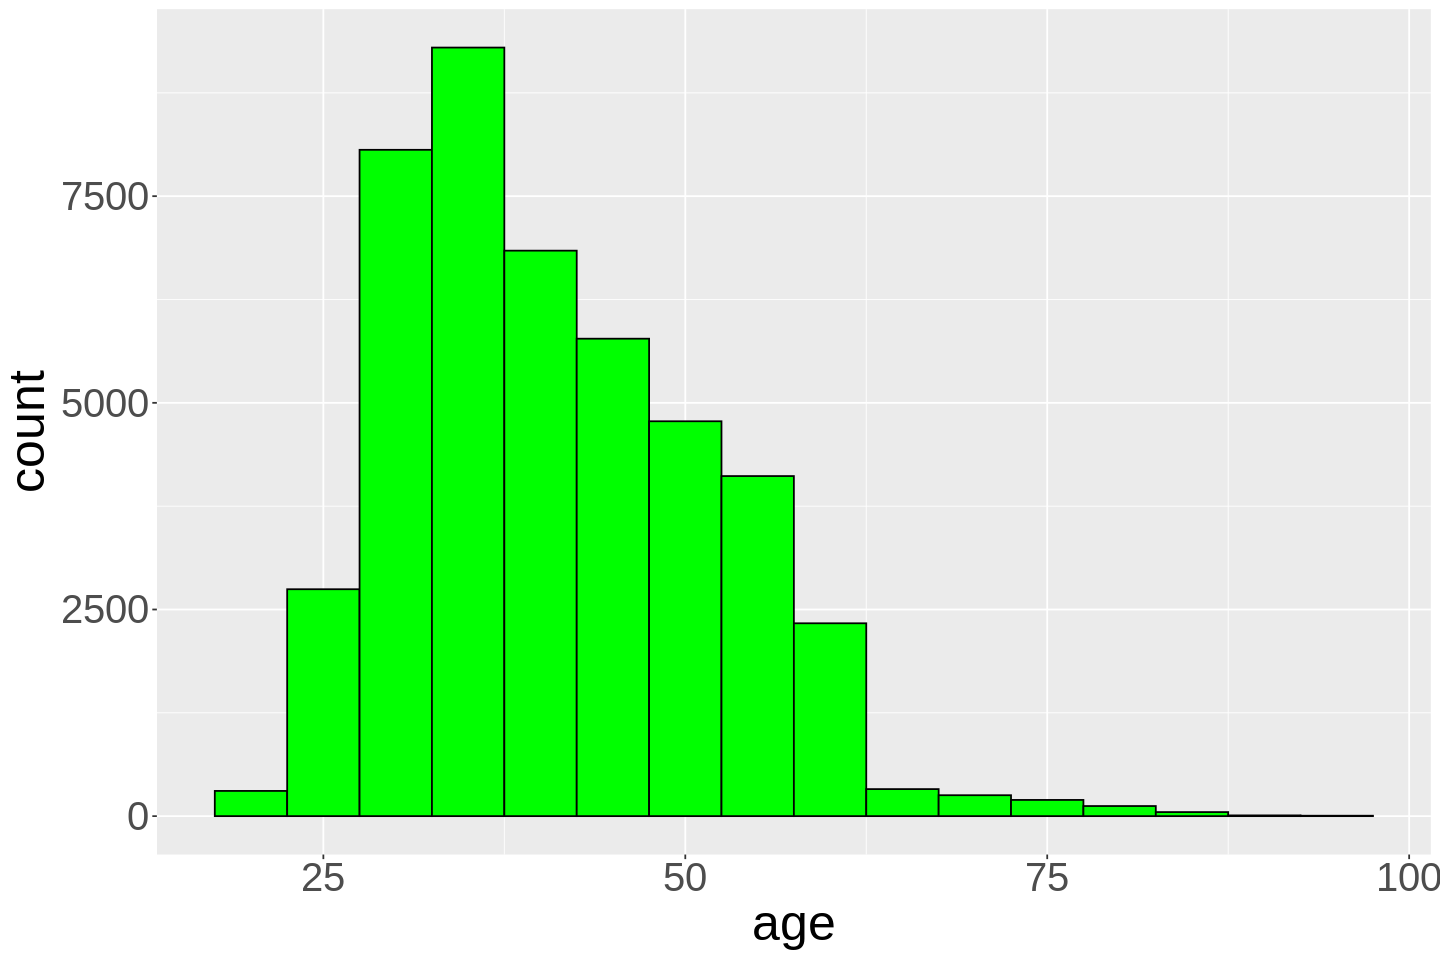

In [ ]:
fig(12, 8)
age_hist <- ggplot(Mt_df, aes(age))
age_hist + geom_histogram(binwidth = 5, color = "black",fill = "green") + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   33.00   39.00   40.94   48.00   95.00 

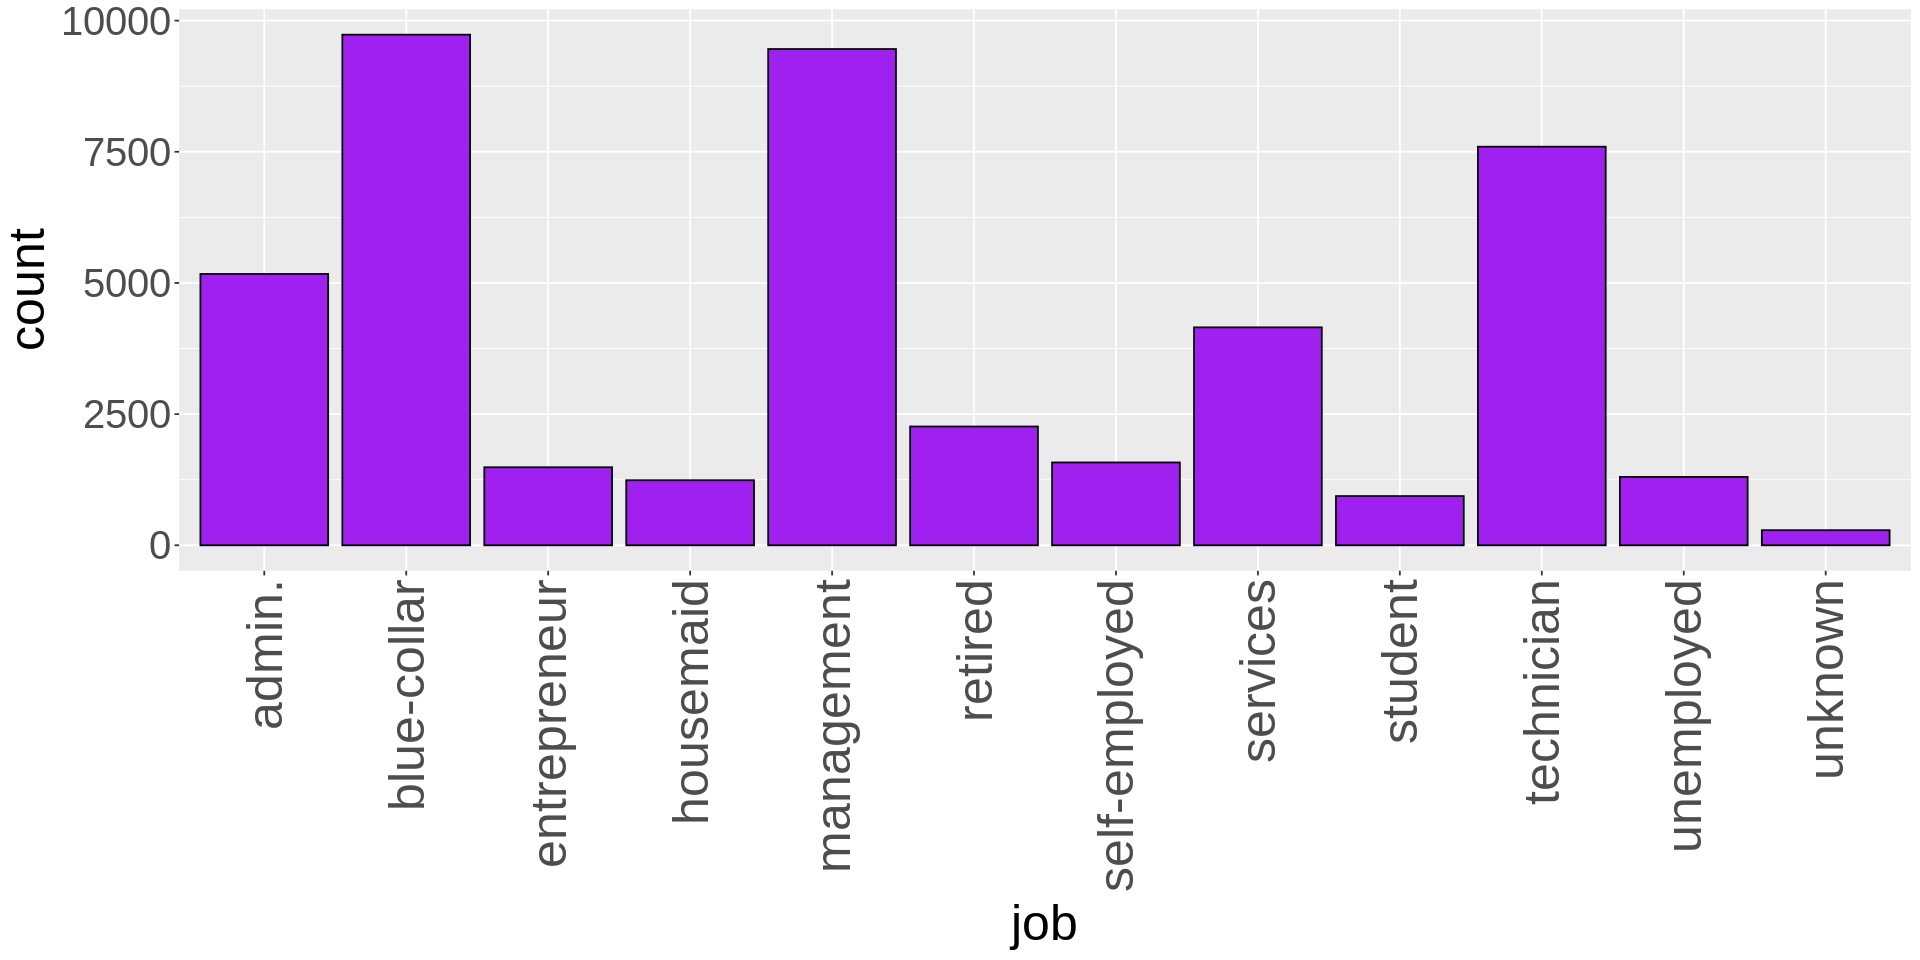

In [ ]:
fig(16, 8)
job_bar <- ggplot(Mt_df, aes(job))
job_bar + geom_bar(color = "black",fill = "purple") +  theme(text = element_text(size=30), axis.text.x=element_text(angle = 90, vjust = 0.5, hjust=1,size=30))

In [ ]:
round(prop.table(table(Mt_df$job))*100,1)


       admin.   blue-collar  entrepreneur     housemaid    management 
         11.4          21.5           3.3           2.7          20.9 
      retired self-employed      services       student    technician 
          5.0           3.5           9.2           2.1          16.8 
   unemployed       unknown 
          2.9           0.6 

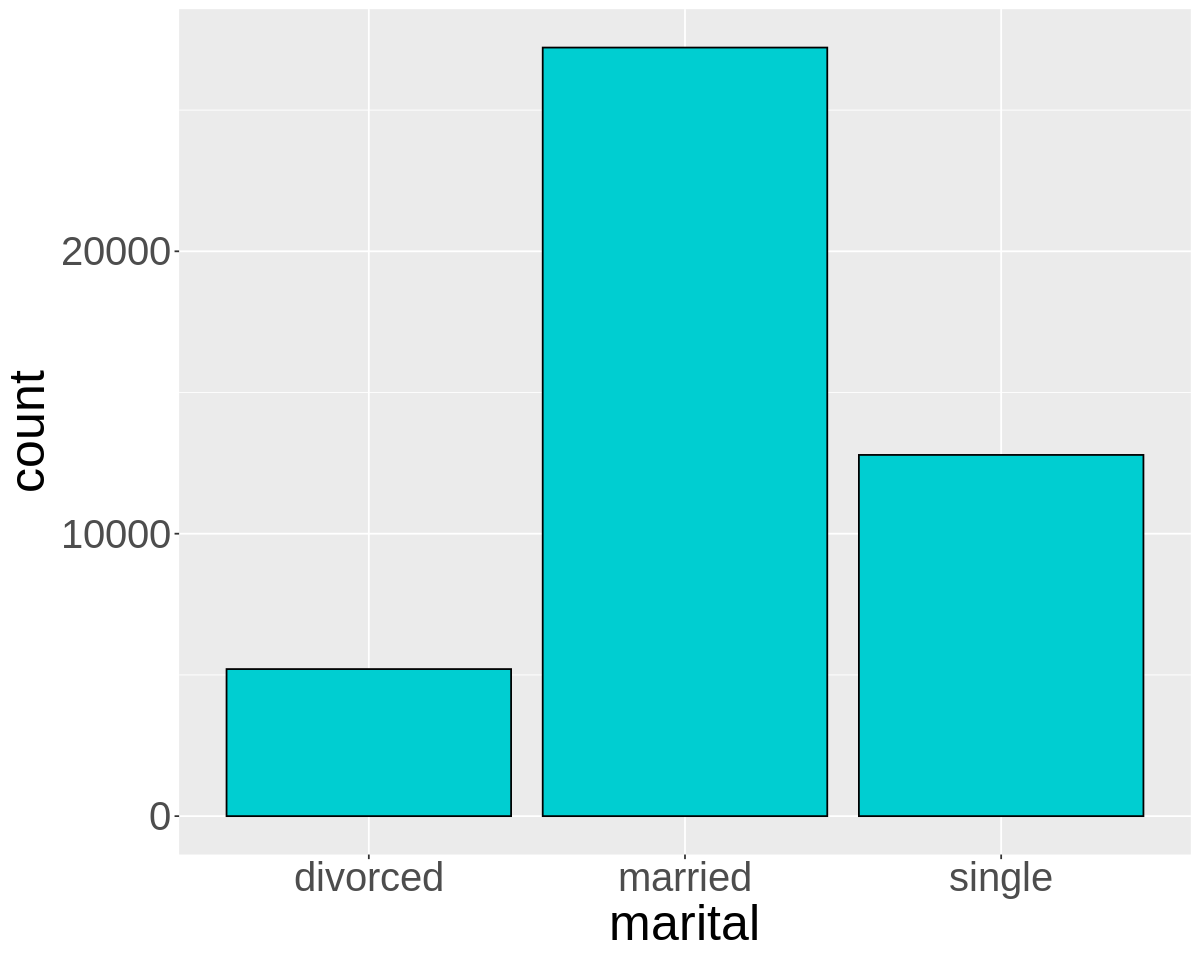

In [ ]:
fig(10, 8)
marital_bar <- ggplot(Mt_df, aes(marital))
marital_bar + geom_bar(color = "black",fill = "darkturquoise") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$marital))*100,1)


divorced  married   single 
    11.5     60.2     28.3 

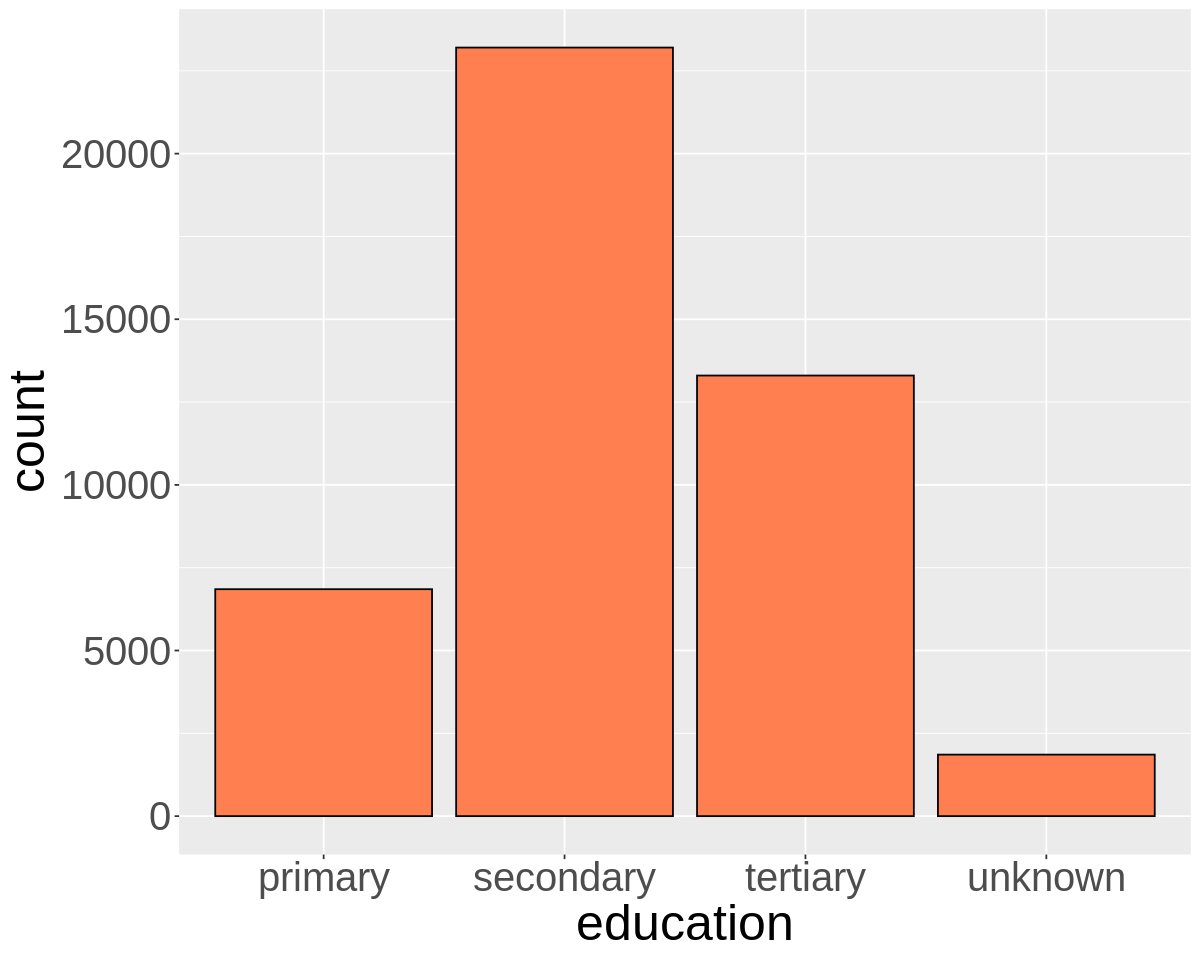

In [ ]:
fig(10, 8)
education_bar <- ggplot(Mt_df, aes(education))
education_bar + geom_bar(color = "black",fill = "coral") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$education))*100,1)


  primary secondary  tertiary   unknown 
     15.2      51.3      29.4       4.1 

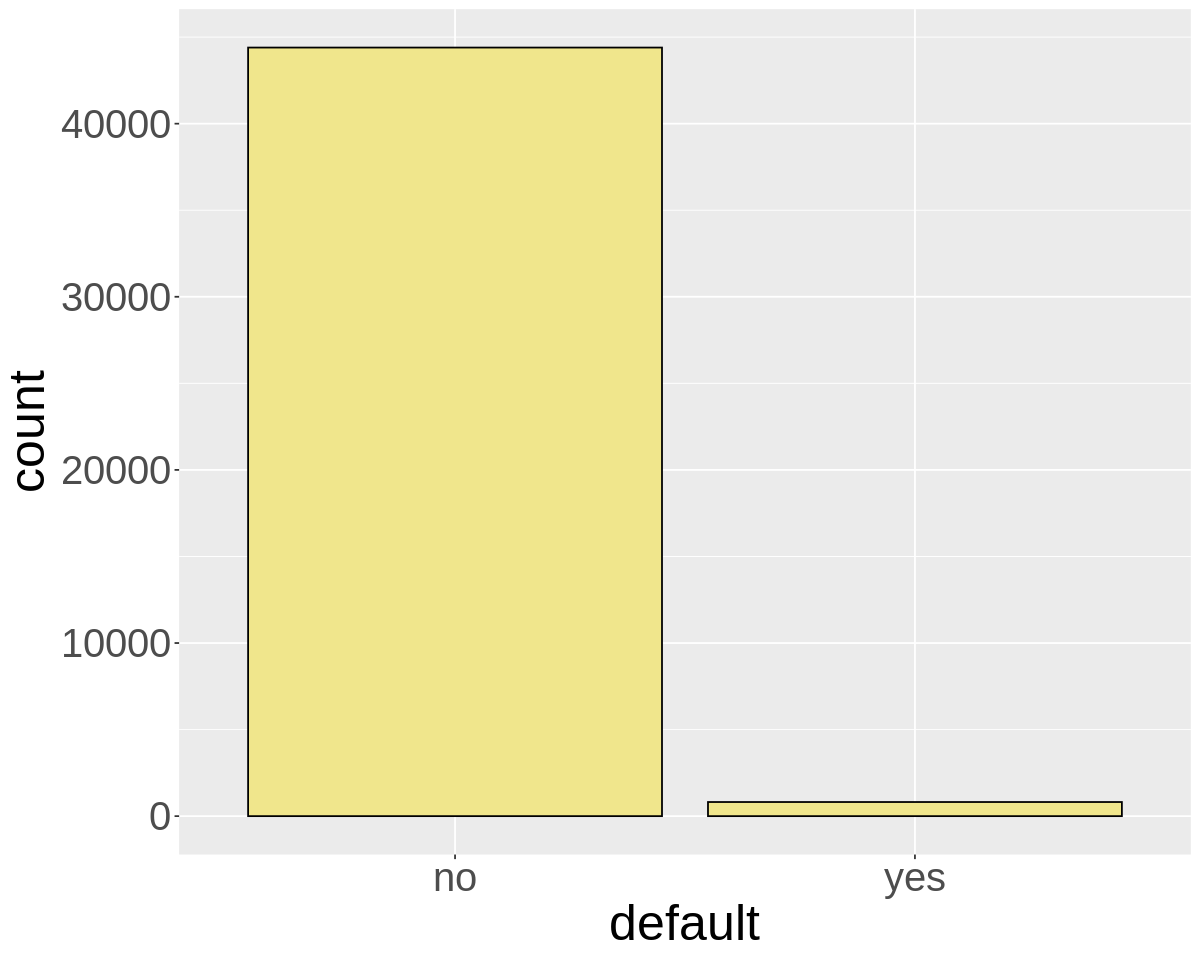

In [ ]:
default_bar <- ggplot(Mt_df, aes(default))
default_bar + geom_bar(color = "black",fill = "khaki") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$default))*100,1)


  no  yes 
98.2  1.8 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


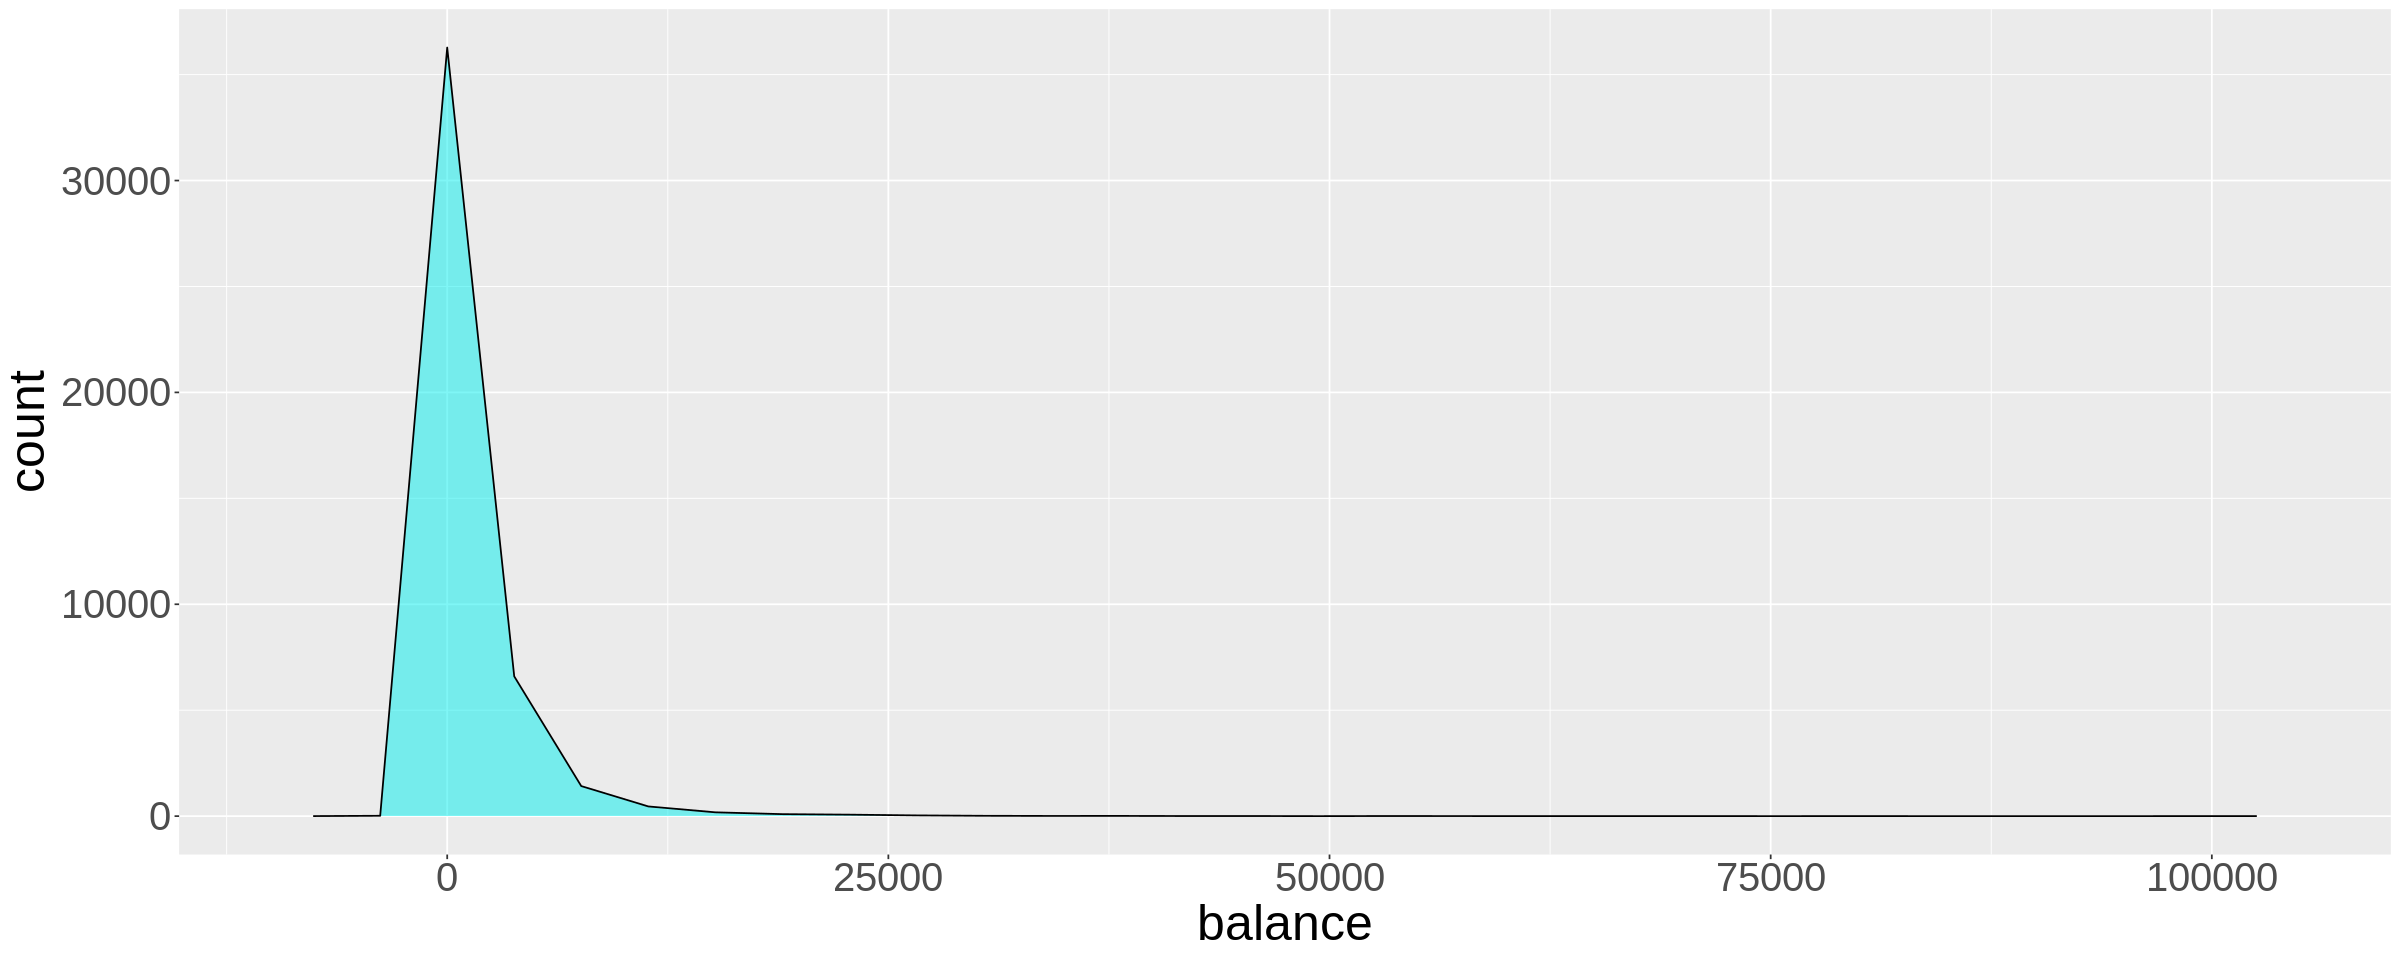

In [ ]:
fig(20, 8)
balance_area <- ggplot(Mt_df, aes(balance))
balance_area + geom_area(stat = "bin", color = "black",fill = "cyan2",alpha = 0.5) + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$balance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -8019      72     448    1362    1428  102127 

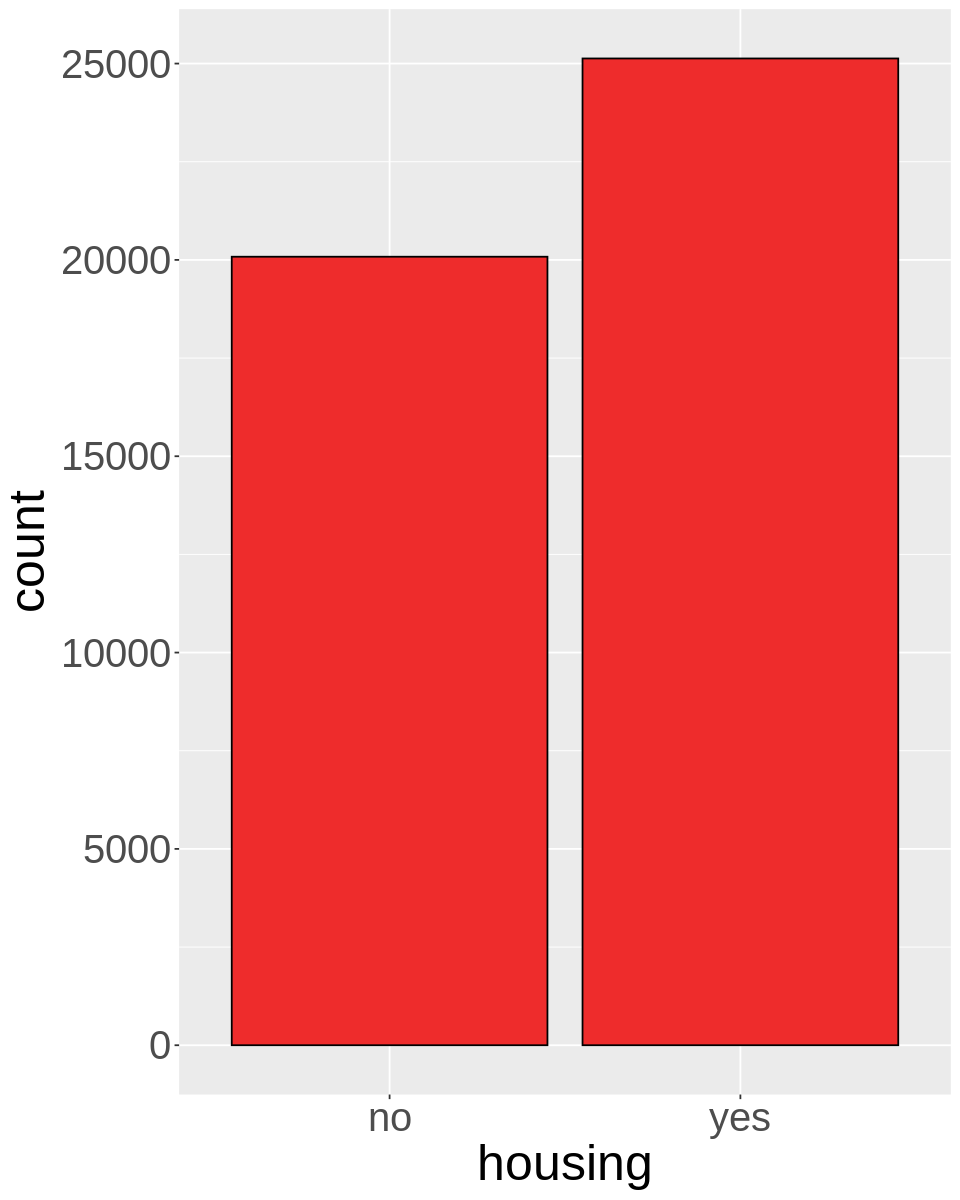

In [ ]:
fig(8,10)
housing_bar <- ggplot(Mt_df, aes(housing))
housing_bar + geom_bar(color = "black",fill = "firebrick2") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$housing))*100,1)


  no  yes 
44.4 55.6 

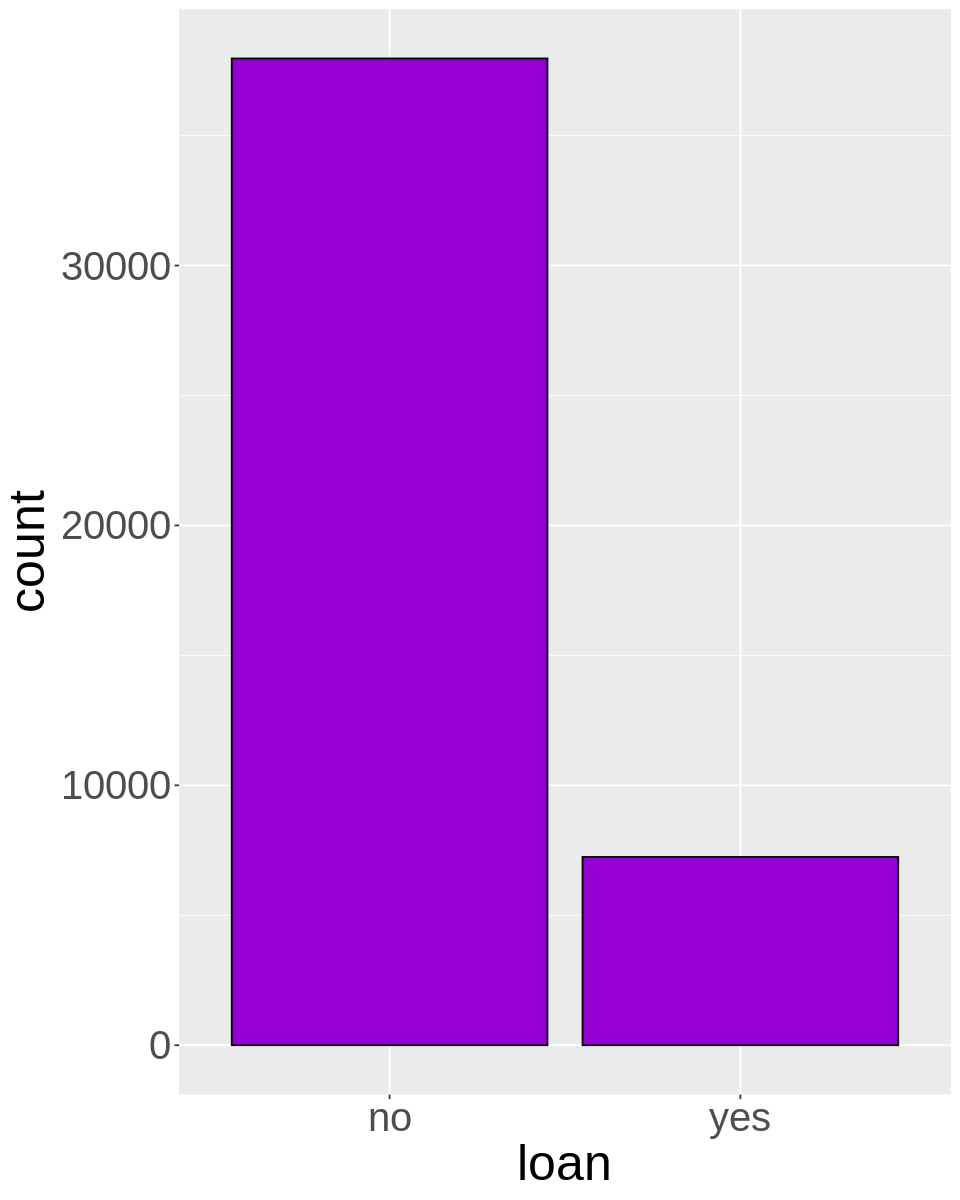

In [ ]:
fig(8,10)
loan_bar <- ggplot(Mt_df, aes(loan))
loan_bar + geom_bar(color = "black",fill = "darkviolet") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$loan))*100,1)


 no yes 
 84  16 

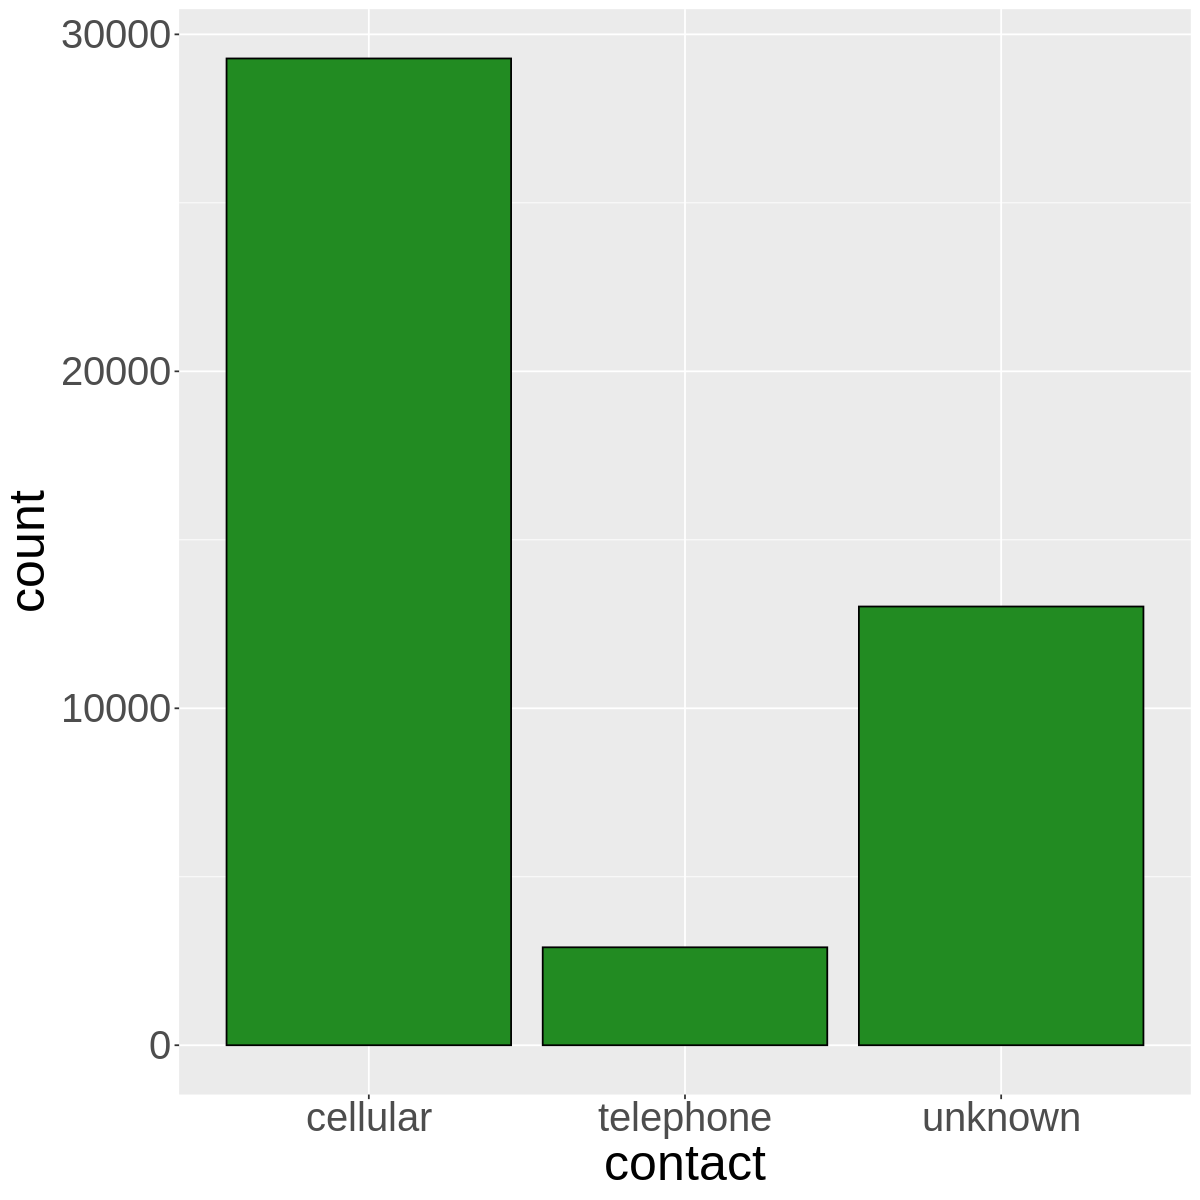

In [ ]:
fig(10,10)
contact_bar <- ggplot(Mt_df, aes(contact))
contact_bar + geom_bar(color = "black",fill = "forestgreen") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$contact))*100,1)


 cellular telephone   unknown 
     64.8       6.4      28.8 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


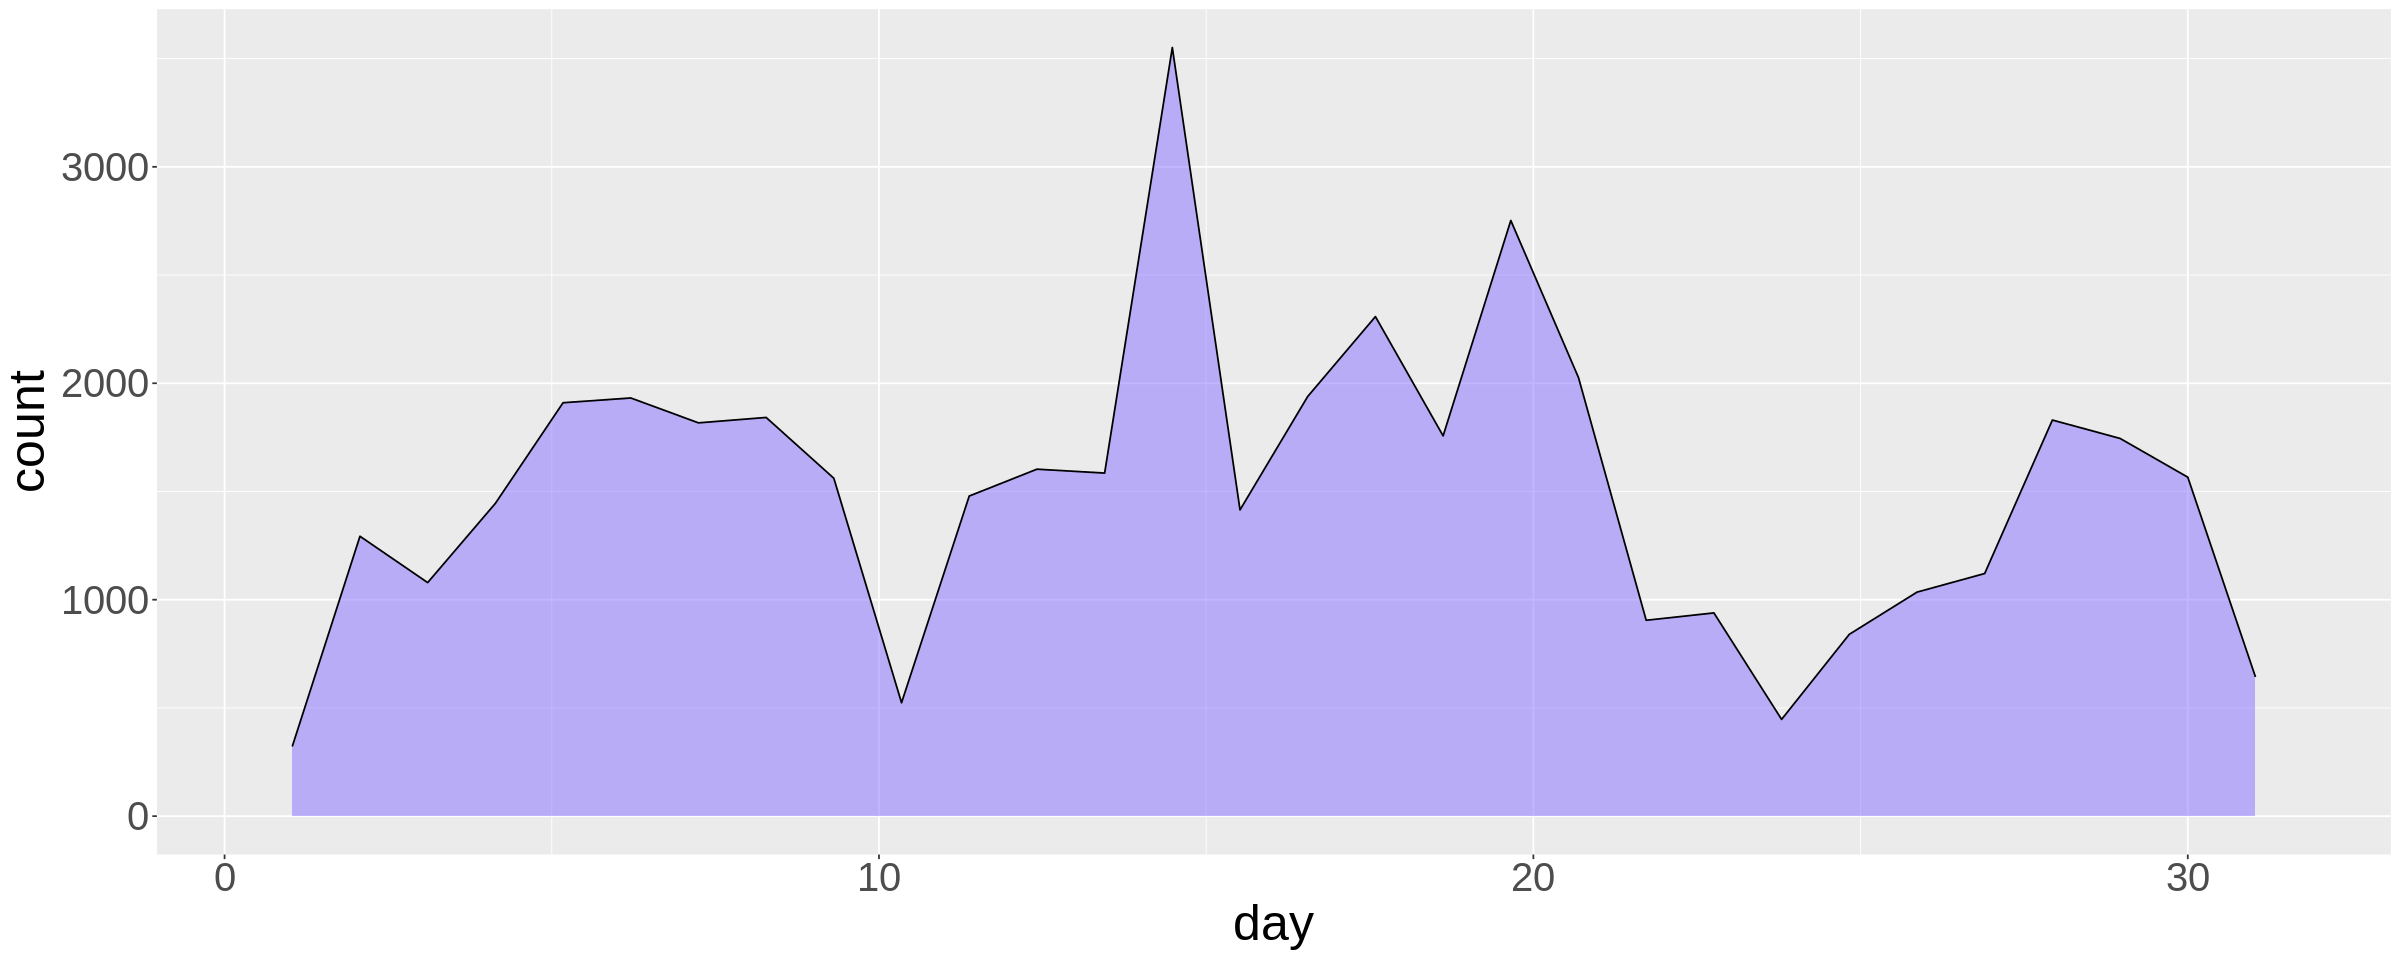

In [ ]:
fig(20, 8)
day_hist <- ggplot(Mt_df, aes(day))
day_hist + geom_area(stat = "bin", color = "black",fill = "slateblue1", alpha = 0.5) + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$day)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   16.00   15.81   21.00   31.00 

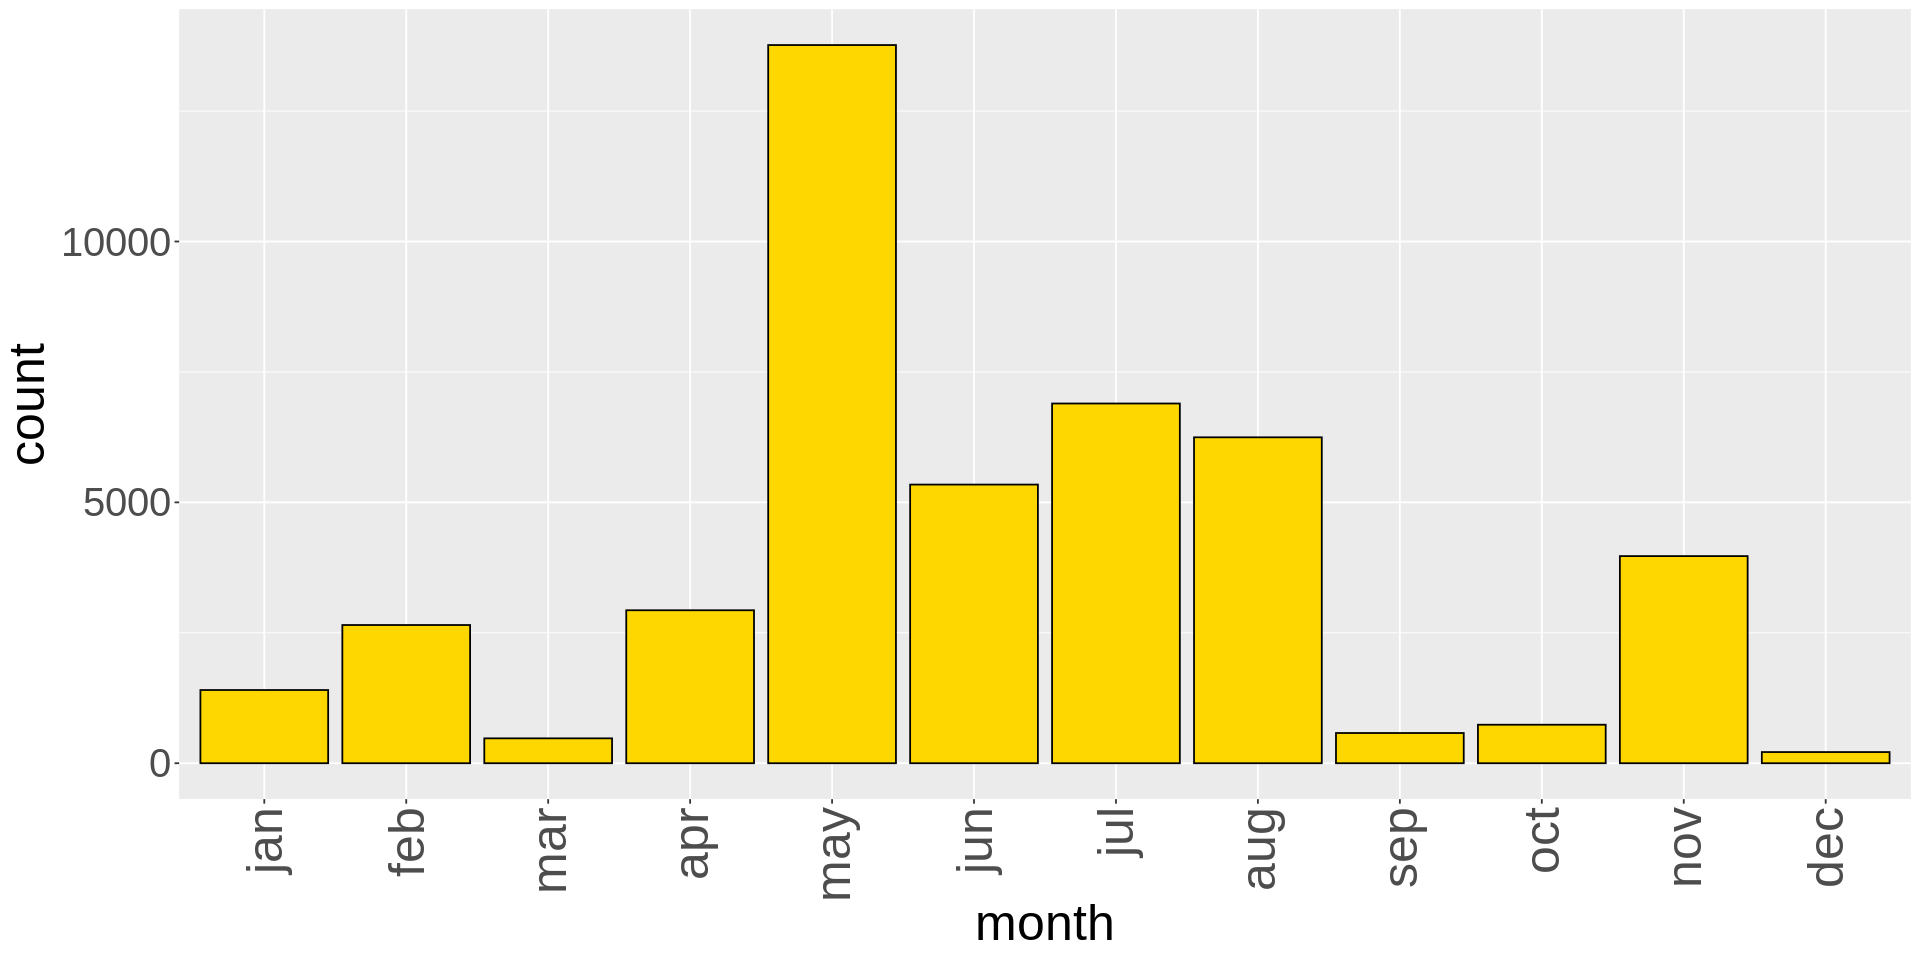

In [ ]:
fig(16, 8)
Mt_df$month <- factor(Mt_df$month,levels = c("jan", "feb", "mar", "apr","may", "jun", "jul", "aug","sep", "oct", "nov", "dec")) #sort by chronological month order
month_bar <- ggplot(Mt_df, aes(month))
month_bar + geom_bar(color = "black",fill = "gold") +  theme(text = element_text(size=30), axis.text.x=element_text(angle = 90, vjust = 0.5, hjust=1,size=30))

In [ ]:
round(prop.table(table(Mt_df$month))*100,1)


 jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec 
 3.1  5.9  1.1  6.5 30.4 11.8 15.3 13.8  1.3  1.6  8.8  0.5 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


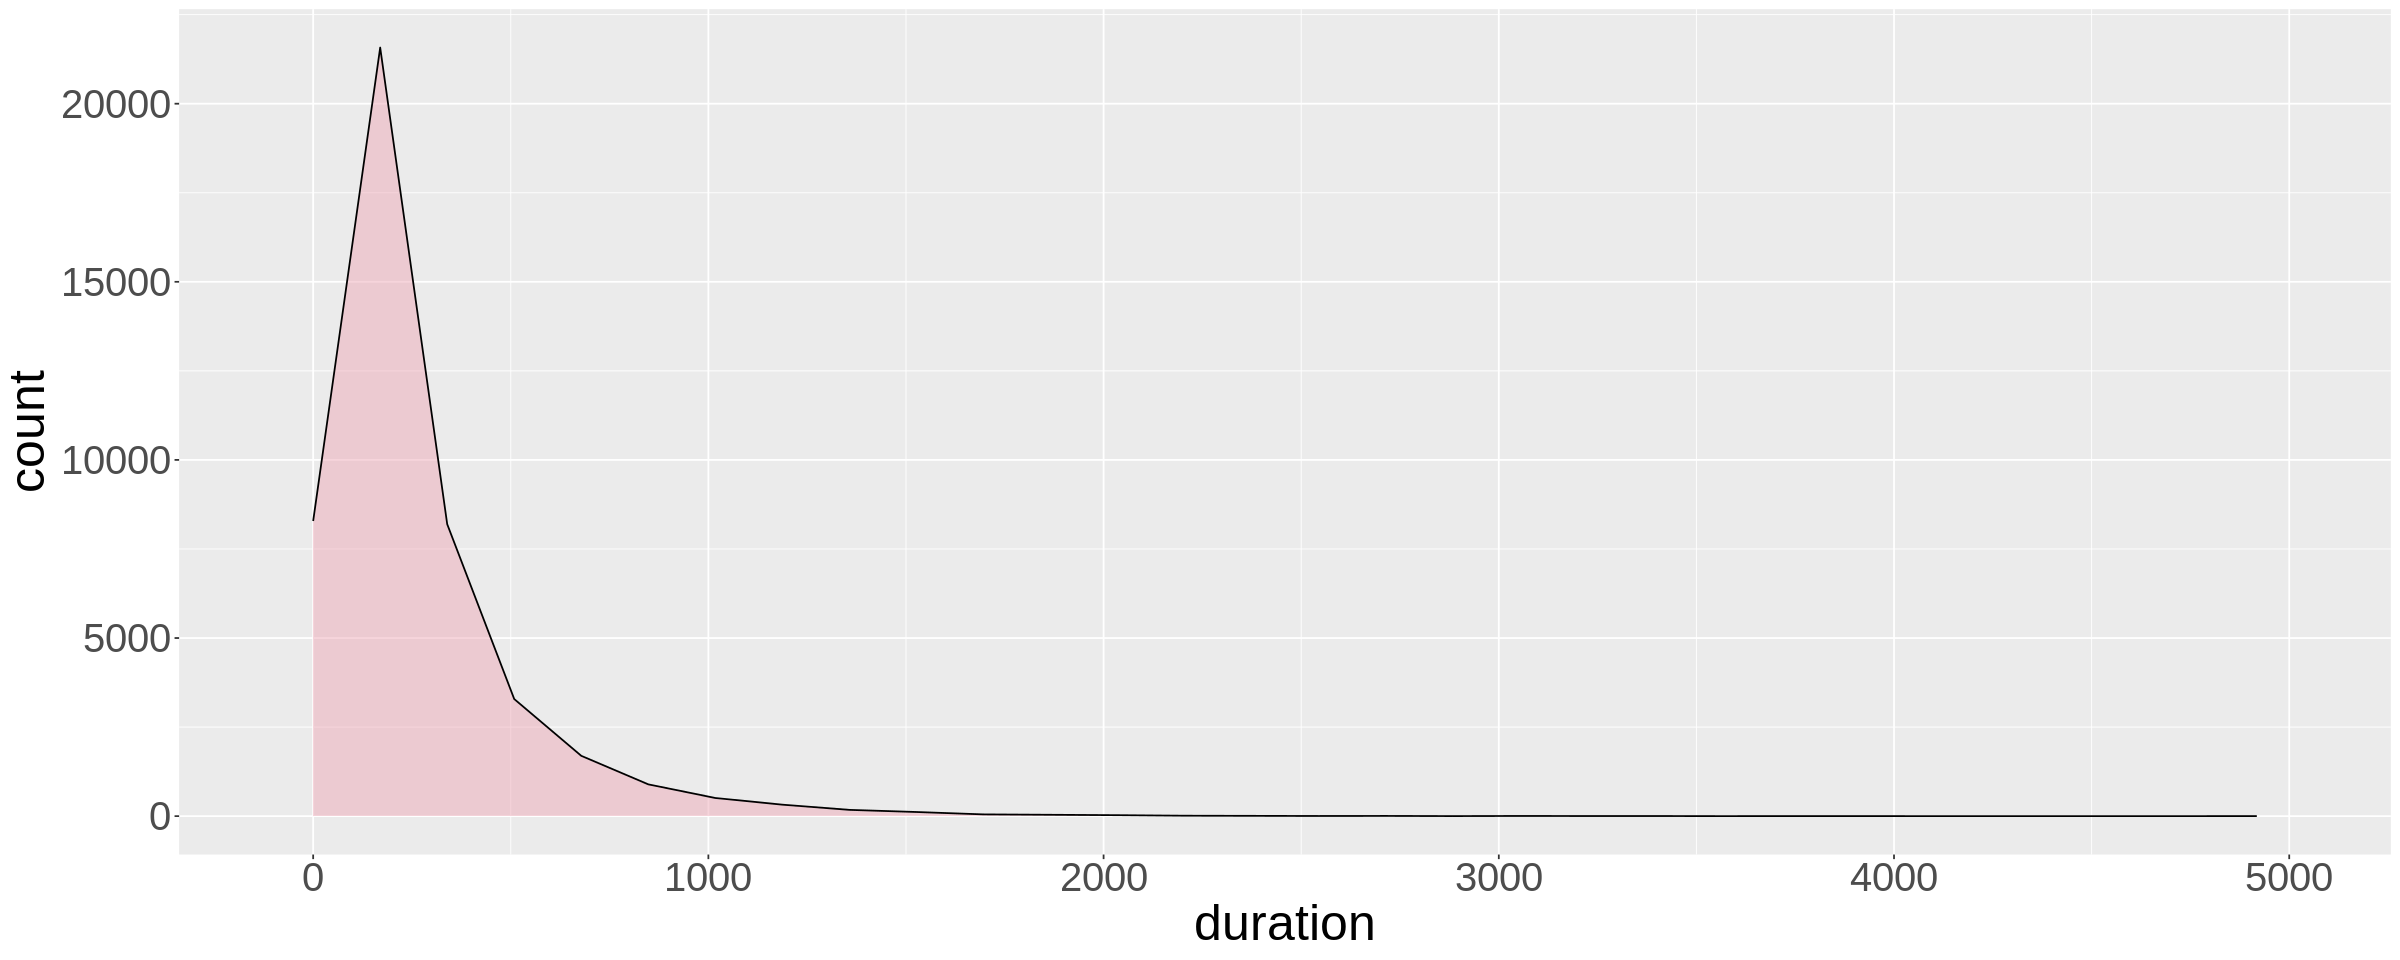

In [ ]:
fig(20, 8)
duration_area <- ggplot(Mt_df, aes(duration))
duration_area + geom_area(stat = "bin", color = "black",fill = "pink2", alpha = 0.5) + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   103.0   180.0   258.2   319.0  4918.0 

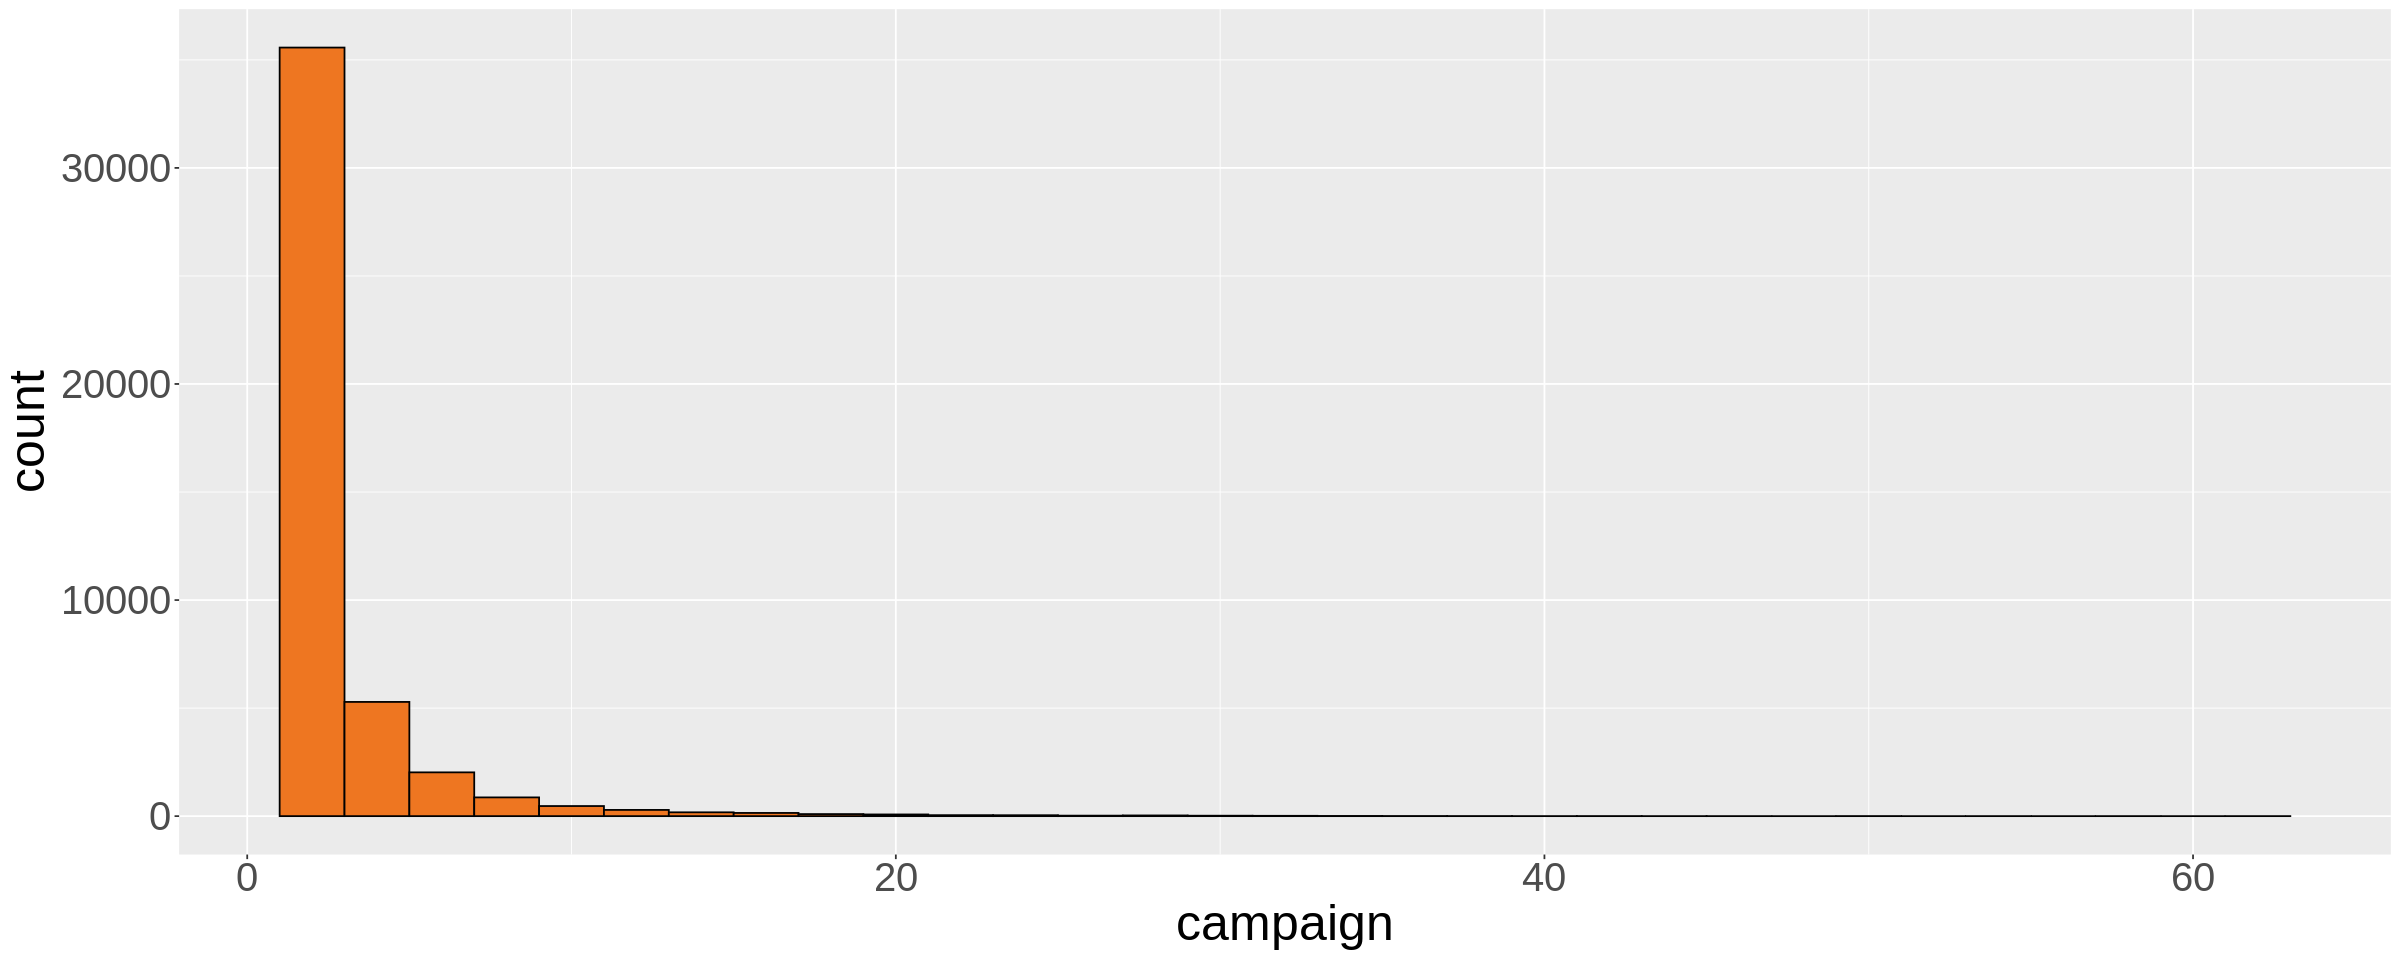

In [ ]:
fig(20, 8)
campaign_hist <- ggplot(Mt_df, aes(campaign))
campaign_hist + geom_histogram(binwidth = 2, color = "black",fill = "chocolate2") + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$campaign)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.764   3.000  63.000 

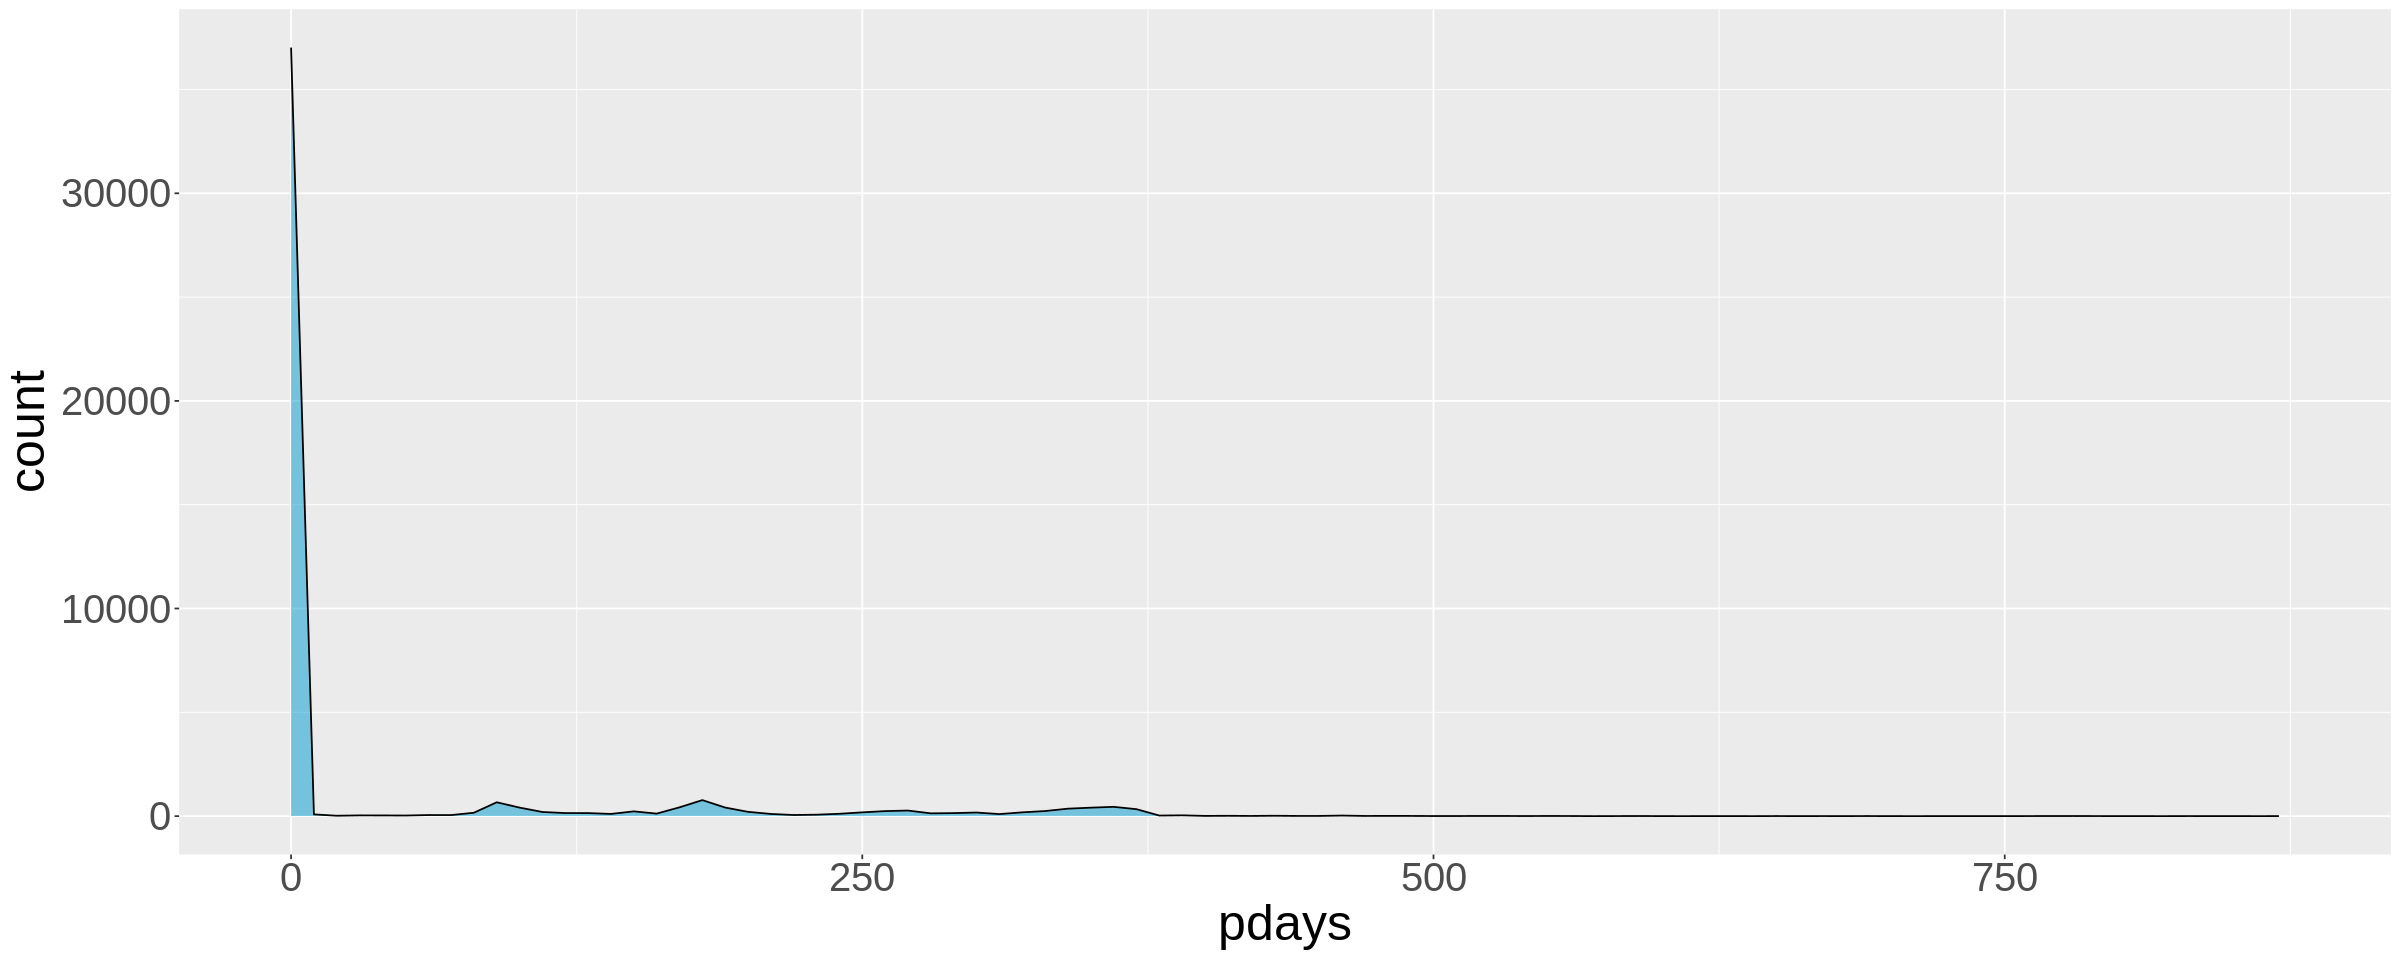

In [ ]:
fig(20, 8)
pdays_area <- ggplot(Mt_df, aes(pdays))
pdays_area + geom_area(binwidth = 10, stat = "bin" ,alpha = 0.5, color = "black",fill = "deepskyblue3") + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$pdays)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -1.0    -1.0    -1.0    40.2    -1.0   871.0 

In [ ]:
round(sum(Mt_df$pdays==-1)/nrow(Mt_df)*100,1)# % of cases which are -1 (meaning not previously contacted)

[1] 81.7

In [ ]:
fig(20, 8)
previous_area <- ggplot(Mt_df, aes(previous))
previous_area + geom_area(binwidth = 10, stat = "bin" ,alpha = 0.5, color = "black",fill = "brown") + theme(text = element_text(size=30))

In [ ]:
summary(Mt_df$previous)

In [ ]:
round(sum(Mt_df$previous==0)/nrow(Mt_df)*100,1)# % of cases which are 0 (meaning not previously contacted)

In [ ]:
fig(12,8)
poutcome_bar <- ggplot(Mt_df, aes(poutcome))
poutcome_bar + geom_bar(color = "black",fill = "springgreen2") + theme(text = element_text(size=30))

In [ ]:
round(prop.table(table(Mt_df$poutcome))*100,1)

# Statistical Models For Classification

## K Nearest Neighbors

![](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

**the steps for making this knn model:**

1. creating a copy of the dataset.
2. converting all X variables that are factors to numeric
3. scaling all the X variables.
4. using linear regression for each x to y for feature selection
5. using accuracy to decide the best k for the model.
6. making a confution matrix and calculating classification metrics for each step (for comparison).

### preprocessing

In [ ]:
knn.df <- Mt_df
head(knn.df)

In [ ]:
for (i in 1:16)
{
    knn.df[,i] <- as.numeric(knn.df[,i])
}
knn.df$pdays[knn.df$pdays==-1]=0
knn.df$previous[knn.df$previous==-1]=0
head(knn.df)

In [ ]:
knn.df1 <- sapply(knn.df[,1:16],scale)
knn.df1 <- as.data.frame(knn.df1)
knn.df <- cbind(knn.df1,knn.df$y)
head(knn.df)

### feature selection

In [ ]:
# significance level using linear regression
knn.df1 <- knn.df
knn.df1[,17] <- as.numeric(knn.df1[,17])
for (i in 1:16)
{
  print(names(knn.df1)[i])
  print(summary(lm(knn.df1[,17]~knn.df1[,i],knn.df1)))
}

In [ ]:
set.seed(8)
train.size = floor(0.75*nrow(knn.df))
train.index = sample(1:nrow(knn.df), train.size)
train.set = knn.df[train.index,]
test.set = knn.df[-train.index,]

x.train = train.set[,-17]
x.test = test.set[,-17]
y.train = train.set[,17]
y.test = test.set[,17]

knn.3 <- knn(train = x.train, test = x.test, cl = y.train , k = 3)
TB = table(predicted = knn.3, true = y.test)
accuracy = round((TB[1]+TB[4])/sum(TB)*100,2)
accuracy

In [ ]:
TB

In [ ]:
library(caret)

# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9539, 401)),
    rep(lvs, times = c(853, 510))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [ ]:
fig(15,10)
k = seq(1,29,2)
i=1
Accuracy=1

for (i in k)
{
  knn.mod <-  knn(train=x.train, test=x.test, cl=y.train, k=i)
  Accuracy[i] <- 100 * sum(y.test == knn.mod)/length(y.test)
  k=i
  cat(k,'=',Accuracy[i],'\n')
}

Accuracy = Accuracy[!is.na(Accuracy)]
k = seq(1,29,2)
Accuracyplot = data.frame(k,Accuracy)
#plot our k
ggplot(Accuracyplot,aes(x=k,y=Accuracy))+
  geom_line(col = "red")+
  expand_limits(y=Accuracy[0])+
  theme_dark() +
  geom_text(aes(label=round(Accuracy,1)),vjust = -0.5,size = 10) +
  theme(text = element_text(size=30))



In [ ]:
knn.15 <- knn(train = x.train, test = x.test, cl = y.train , k = 15)
TB = table(predicted = knn.15, true = y.test)
TB


In [ ]:
library(caret)

# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9744, 196)),
    rep(lvs, times = c(980, 383))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
library(ggplot2)
library(dplyr)

table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Logistic Regression

![](https://www.equiskill.com/wp-content/uploads/2018/07/WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg)


**the steps for making this lr model:**

1. creating a copy of the dataset.
2. creating dummy variables and checking for statistical significance.
3. creating the model.
4. checking the model at optimal cutoff.
4. making a confution matrix and calculating classification metrics for each step (for comparison).

### preprocessing

In [ ]:
lr.df <- Mt_df
head(lr.df)

In [ ]:
library(fastDummies)
lr.df = dummy_cols(lr.df, select_columns = c("job","marital","education","contact","month","poutcome"))
head(lr.df)

In [ ]:
# significance level using linear regression
lr.df1 <- lr.df
lr.df1[,17] <- as.numeric(lr.df1[,17])
for (i in 18:55)
{
  print(names(lr.df1)[i])
  print(summary(lm(lr.df1[,17]~lr.df1[,i],lr.df1)))
}

In [ ]:
str(lr.df)

In [ ]:
lr.df <- lr.df[,-c(2,3,4,9,11,16,18,24,27,29,30,40,47)]
head(lr.df)

In [ ]:
lr.df$default = as.numeric(lr.df$default)
lr.df$housing = as.numeric(lr.df$housing)
lr.df$loan = as.numeric(lr.df$loan)
lr.df$y = as.numeric(lr.df$y)

lr.df$default = ifelse(lr.df$default == 2, 1, 0)
lr.df$housing = ifelse(lr.df$housing == 2, 1, 0)
lr.df$loan = ifelse(lr.df$loan == 2, 1, 0)
lr.df$y = ifelse(lr.df$y == 2, 1, 0)

str(lr.df)

In [ ]:
#library(mccr)
library(InformationValue)
set.seed(8)
train.size = floor(0.75*nrow(lr.df))
train.index = sample(1:nrow(lr.df), train.size)
train.set = lr.df[train.index,]
test.set = lr.df[-train.index,]


logit_reg = glm(y ~ ., data = train.set, family = binomial(link = "logit"))
summary(logit_reg)

Prediction = predict(logit_reg, test.set, type = "response")
plotROC(test.set$y, Prediction)

In [ ]:
confusionMatrix(test.set$y,Prediction, threshold = 0.5)

In [ ]:
library(caret)

# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9712, 228)),
    rep(lvs, times = c(901, 462))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [ ]:
optCutOff = optimalCutoff(test.set$y, Prediction, optimiseFor = "misclasserror")
optCutOff

In [ ]:
confusionMatrix(test.set$y,Prediction, threshold = optCutOff)

In [ ]:
# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9562, 378)),
    rep(lvs, times = c(740, 623))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Decision Tree

![](https://media2.giphy.com/media/D6hp1PFOUBojK/giphy.gif)

In [ ]:
dt.df <- Mt_df
head(dt.df)

In [ ]:
library(tree)
set.seed(8)
train.size = floor(0.75*nrow(dt.df))
train.index = sample(1:nrow(dt.df), train.size)
train.set = dt.df[train.index,]
test.set = dt.df[-train.index,]
y.test = dt.df[-train.index,17]
dt.model=tree(y~.,dt.df, subset = train.index)
summary(dt.model)

In [ ]:
plot(dt.model)
text(dt.model,pretty=0,cex = 2)

In [ ]:
Prediction.dt=predict(dt.model,test.set,type="class")
table(predicted = Prediction.dt, true = y.test)

In [ ]:
# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9409, 531)),
    rep(lvs, times = c(725, 638))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [ ]:
cv_dt.model=cv.tree(dt.model,FUN=prune.misclass)
plot(cv_dt.model$size,cv_dt.model$dev,type="b",cex.lab=2, cex.axis=2, cex.main=2, cex.sub=2)

In [ ]:
prune_dt.model=prune.misclass(dt.model,best=9)
summary(prune_dt.model)
plot(prune_dt.model)
text(prune_dt.model,pretty=0,cex=2)

In [ ]:
prune_dt.model=prune.misclass(dt.model,best=4)
summary(prune_dt.model)
plot(prune_dt.model)
text(prune_dt.model,pretty=0,cex=2)

In [ ]:
Prediction.dt2=predict(prune_dt.model,test.set,type="class")
table(predicted = Prediction.dt2, true = y.test)

In [ ]:
# data/code from "2 class example" example courtesy of ?caret::confusionMatrix

lvs <- c("no", "yes")
truth <- factor(rep(lvs, times = c(9940, 1363)),
                levels = rev(lvs))
pred <- factor(
  c(
    rep(lvs, times = c(9409, 531)),
    rep(lvs, times = c(725, 638))),
  levels = rev(lvs))

caret::confusionMatrix(pred, truth)

In [ ]:
table <- data.frame(caret::confusionMatrix(pred, truth)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

## Random Forest

![](http://talimi.se/wp-content/uploads/2017/08/Ska%CC%88rmavbild-2017-09-03-kl.-15.28.56-e1504456128643.png)

In [ ]:
library(randomForest)
set.seed(8)
rf.df <- Mt_df
train.size = floor(0.75*nrow(rf.df))
train.index = sample(1:nrow(rf.df), train.size)
train.set = rf.df[train.index,]
test.set = rf.df[-train.index,]
y.test = rf.df[-train.index,17]
rf.model <- randomForest(y ~ .,data=train.set)
Prediction.rf = predict(rf.model, newdata=test.set)
table(predicted = Prediction.rf, true = y.test)

In [ ]:
print(rf.model)
#Evaluate variable importance
importance(rf.model)
varImpPlot(rf.model,cex = 2)

In [ ]:
caret::confusionMatrix(Prediction.rf, y.test,positive="yes")

In [ ]:
table <- data.frame(caret::confusionMatrix(Prediction.rf, y.test,positive="yes")$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

In [ ]:
library(randomForest)
set.seed(8)
rf.finalmodel <- randomForest(y ~ .,data=rf.df)
Predictionfinal = predict(rf.finalmodel, newdata=test_df)
table(predicted = Predictionfinal, true = test_df[,17])

In [ ]:
caret::confusionMatrix(Predictionfinal, test_df[,17],positive="yes")

In [ ]:
table <- data.frame(caret::confusionMatrix(Predictionfinal, test_df[,17],positive="yes")$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1,size = 30) +
  scale_fill_manual(values = c(good = "forestgreen", bad = "firebrick1")) +
  theme_bw() +
  xlim(rev(levels(table$Reference))) +
theme(text = element_text(size=30)) +
xlab("True Value")

# Conclusion

The Random Forest model that performed the best at the train data has performed extremely well at the test data, the main aim here is to maximize the bank's profit by idetifying as much people that will use the bank's term deposit,
The model succesfully identifyed **84%** of the poeple that chose to use this deposit (**438 out of 521**). cohen's kappa statistic has shown a moderate agreement between the prection and the actual data which is a good indicator of the reliebility of the model.


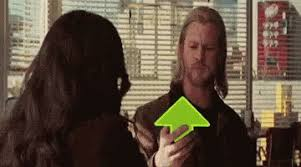